In [11]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
# Parámetros de las distribuciones
lambda_poisson = 1  # Parámetro de la distribución Poisson (frecuencia de siniestros)
media = 2000000  # Media de la distribución Gamma (2 millones)
varianza = 5000000  # Varianza de la distribución Gamma (5 millones)
# Calcular los parámetros k (forma) y theta (escala) de la distribución Gamma
k = media**2 / varianza  # Parámetro de forma (k)
theta = varianza / media  # Parámetro de escala (theta)
# Simular 1000 valores de una distribución Gamma
num_simulaciones = 10000  # Número de simulaciones a realizar


In [5]:

# Realizar 1000 simulaciones
costos_totales = []
for i in range(num_simulaciones):
    # Simulación de la frecuencia de siniestros (número de siniestros) con distribución Poisson
    num_siniestros = np.random.poisson(lambda_poisson)
    
    # Inicializar una lista para almacenar el costo de cada siniestro
    costos_siniestros = []
    
    # Para cada siniestro, generar 1000 valores de la distribución Gamma para la severidad
    for _ in range(num_siniestros):
        # Generar 1000 valores de la distribución Gamma (severidad)
        severidad_siniestro = np.random.gamma(k, theta, 1000)
        
        # Sumar los valores de la severidad para obtener el costo total de ese siniestro
        costo_siniestro = np.sum(severidad_siniestro * num_siniestros )
        
        # Guardar el costo de ese siniestro en la lista
        costos_siniestros.append(costo_siniestro)
    
    # Calcular el costo total de la cartera para esta simulación (sumar todos los costos de los siniestros)
    costo_total = np.sum(costos_siniestros)
    
    # Guardar el costo total en la lista de costos
    costos_totales.append(costo_total)

# Convertir la lista de costos totales a un array de NumPy para análisis
costos_totales = np.array(costos_totales)

# Mostrar los resultados generales
print(f"Costo total promedio (1000 simulaciones): {np.mean(costos_totales):,.2f} USD")
print(f"Desviación estándar del costo total: {np.std(costos_totales):,.2f} USD")


Costo total promedio (1000 simulaciones): 3,952,000,466.28 USD
Desviación estándar del costo total: 6,563,847,178.11 USD


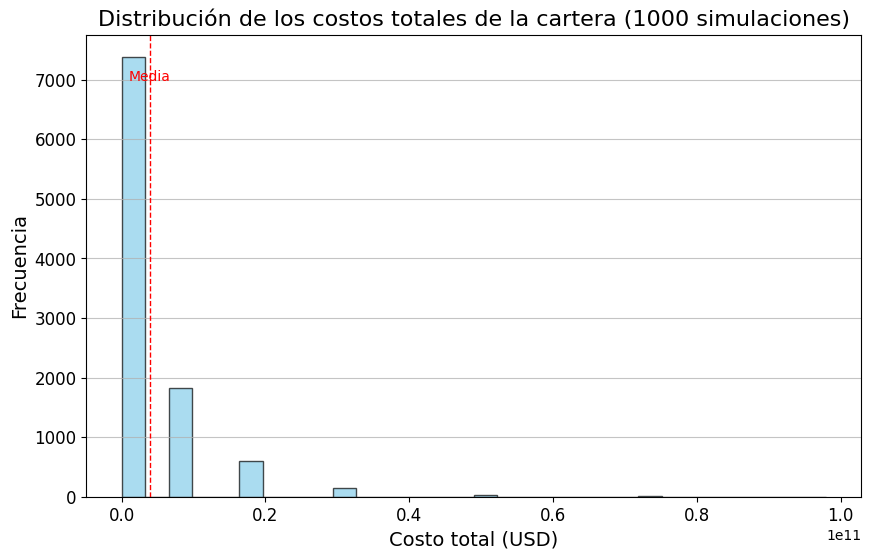

In [12]:
import matplotlib.pyplot as plt

# Graficar el histograma de los costos totales de las 1000 simulaciones
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.hist(costos_totales, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.title("Distribución de los costos totales de la cartera (1000 simulaciones)", fontsize=16)
plt.xlabel("Costo total (USD)", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.grid(axis='y', alpha=0.75)  # Añadir cuadrícula solo en el eje y
plt.xticks(fontsize=12)  # Cambiar el tamaño de las etiquetas en el eje x
plt.yticks(fontsize=12)  # Cambiar el tamaño de las etiquetas en el eje y
plt.axvline(x=sum(costos_totales) / len(costos_totales), color='red', linestyle='dashed', linewidth=1)  # Línea de media
plt.text(sum(costos_totales) / len(costos_totales), plt.ylim()[1]*0.9, 'Media', color='red', ha='center')  # Etiqueta de la media

plt.show()